<div style="text-align: left; background-color:#E9F7EF; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">ĐỒ ÁN THỰC HÀNH</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">| Bộ môn: Python Cho Khoa Học Dữ Liệu |</div>

# <div style="text-align: left; background-color:#0C6A86; font-family:Tahoma; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">NỘI DUNG: ĐẶT VÀ TRẢ LỜI CÁC CÂU HỎI CÓ Ý NGHĨA</div>

<!-- <a id="top"></a> -->
<div class="list-group" id="list-tab" role="tablist">
    <h3 style="text-align: left; background-color: #ACA224; font-family:Tahoma; color: white; padding: 14px; line-height: 1; border-radius:10px"><b>Mục lục 📝</b></h3>
    
   * [I. Mô tả chung](#1)
        
   * [II. Nội dung thực hiện](#2)
        - [Yêu cầu 1](#2.1)
        - [Yêu cầu 2](#2.2)
        - [Yêu cầu 3](#2.3)
        - [Yêu cầu 4](#2.4)
        - [Yêu cầu 5](#2.5)
        - [Yêu cầu 6](#2.6)
        - [Yêu cầu 7](#2.7)


<a id="1"></a>
## **<div style="text-align: left; background-color:#ACA224; font-family:Questrial;color: white; padding: 14px; line-height: 1;border-radius:10px">I. Mô tả chung</div>**

<div style="border-radius:10px;border:#0C6A86 solid;padding: 15px;background-color:#ebfae8;font-size:110%;text-align:left">
💬 <span style='color:#2B9C15 '> Ở phần này nhóm sẽ cùng nhau suy nghĩ ra một vài câu hỏi ý nghĩa có thể hỏi từ bộ dữ liệu. Sau đó thông qua các bước tiền xử lý và phân tích dữ liệu chúng ta sẽ tìm được lời giải đáp cho những câu hỏi đó một cách trực quan sinh động nhất. </span>

👉 <span style='color:#2B9C15 '>Lưu ý: Các insight nhóm có được trong phần này, là hoàn toàn dựa trên việc phân tích bộ dữ liệu đã thu thập.</span>


<a id="2"></a>
## <div style="text-align: left; background-color:#ACA224; font-family:Questrial;color: white; padding: 14px; line-height: 1;border-radius:10px">II. Nội dung thực hiện</div>

👉 Trước tên ta cần import và cài đặt một số thư viện cần thiết.

<a id="2.1"></a>
### **<div style="text-align: left; background-color:#ACA224; font-family:Tahoma;color: white; padding: 14px; line-height: 1;border-radius:10px">1. Import Những Thư Viện Cần Thiết</div>**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
%matplotlib inline
import random
from datetime import datetime
import warnings
warnings.simplefilter('ignore')
import plotly.express as px

<a id="2"></a>
### **<div style="text-align: left; background-color:#ACA224; font-family:Tahoma;color: white; padding: 14px; line-height: 1;border-radius:10px">2. Lấy dữ liệu Giao Thông</div>**
- `./afterPreprocess.csv`: Chứa dữ liệu giao thông dạng bảng.
- `./guidance.xlsx`: Chứa thông tin về các trường dữ liệu trong `./afterPreprocess.csv`.

**Yêu cầu 0**: Đầu tiên, chúng ta đọc dữ liệu từ file `./afterPreprocess.csv` và assign vào dataframe `df`. In ra shape và 5 dòng đầu tiên của dữ liệu.

In [2]:
df = pd.read_csv("./afterPreprocess.csv")
df.head()

,Unnamed: 0,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,0,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,28
1,1,2014-01-01,00:05:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,29
2,2,2014-01-01,02:20:00,Dry,Fine without high winds,Car,Driver,Slight,Female,21
3,3,2014-01-01,01:30:00,Wet/Damp,Fine without high winds,Car,Pedestrian,Serious,Female,34
4,4,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Driver,Slight,Male,34


<a id="2"></a>
### **<div style="text-align: left; background-color:#ACA224; font-family:Tahoma;color: white; padding: 14px; line-height: 1;border-radius:10px">3. Khám phá dữ liệu (đan xen Tiền xử lý dữ liệu)</div>**

<a id="2.1"></a>
<div style="text-align: left; background-color:#DCEAF0; font-family:Arial;color: #2A6C8F; padding:10px 10px;border-radius:12px 5px 12px 5px;width:110px;font-size: 23px;border-style: solid;border-color: green">Câu hỏi 1</div>

### **<span style='color:#2B9C15 '>🤔 Nội dung câu hỏi </span>**


### *Dữ liệu có bao nhiêu dòng và bao nhiêu cột?*
			Dữ liệu có 13839 dòng và 10 cột

In [3]:
df.shape

(13839, 10)

### *Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?*
Theo sự quan sát sơ bộ về dữ liệu của chúng mình, mỗi dòng trong Dataframe `df` cho biết về thông tin của một vụ tai nạn. Có vẻ không có vấn đề các dòng có ý nghĩa khác nhau (Nếu trong quá trình làm phát hiện ra vấn đề thì ta quay lại đây.)

### *Dữ liệu có bị trùng lặp không?*
	Dữ liệu không có sự trùng lặp
Nếu trong nhóm các dòng có index giống nhau thì dòng đầu tiên không tính là bị lặp.

In [4]:
num_duplicated_rows = len(list(df.index)) - len(set(df.index))
print(num_duplicated_rows)

0


### *Mỗi cột có ý nghĩa gì?*
	* Accident Date: Ngày xảy ra tai nạn
	* Time (24hr): Giờ xảy ra tai nạn
	* Road Surface: Tình trạng mặt đường
	* Weather Conditions: Điều kiện thời tiết lúc đấy
	* Type of Vehicle: Loại phương tiện gây tai nạn
	* Casualty Class: Đối tượng có trong vụ tai nạn
	* Casualty Severity: Mức độ nghiêm trọng của vụ tai nạn
	* Sex of Casualty: Giới tính đối tượng
	* Age of Casualty: Tuổi của đối tượng

In [5]:
list(df.columns)

['Unnamed: 0',
 'Accident Date',
 'Time (24hr)',
 'Road Surface',
 'Weather Conditions',
 'Type of Vehicle',
 'Casualty Class',
 'Casualty Severity',
 'Sex of Casualty',
 'Age of Casualty']

### *Kiểm tra kiểu dữ liệu có phù hợp để phân tích hay không?*
	Ta thấy các cột đa phần đều ở dạng object, điều này là không nên bởi vì nếu cột nào cũng ở dạng object thì rất khó tính toán. 
	Ta thấy rằng có 3 cột có thể chuyển sang dạng khác đó là cột Accident Date (datetime), Time (24hr) (datetime). Chúng mình sẽ tiến hành chuyển dạng của các cột này

In [6]:
# Ta kiểm tra dạng dữ liệu của các cột để xem có đúng với dạng mà ta mong muốn không.
df.dtypes

Unnamed: 0             int64
Accident Date         object
Time (24hr)           object
Road Surface          object
Weather Conditions    object
Type of Vehicle       object
Casualty Class        object
Casualty Severity     object
Sex of Casualty       object
Age of Casualty        int64
dtype: object

In [7]:
# for i in range(len(df.index)):
#       df["Accident Date"] = pd.to_datetime(df["Accident Date"], format='%Y-%m-%d')
#       df['Time (24hr)'] = pd.to_datetime(df['Time (24hr)'], format='%H:%M:%S')

👉 Không nên dùng hàm to_datetime của thư viện pandas hoặc gán lại kiểu dữ liệu cho từng dữ liệu vì sẽ gây mất thời gian thực hiện. Nên đưa vào trong một list mới bằng strptime của datetime hoặc parser.parse của thư viện dateutil sau đó `gán lại giá trị cho cột đấy.`

👉 Để run cell trên thì phải mất đến hơn 5 phút

In [8]:

dt = []
time = []
list_year = []
list_month = []
for i in range(len(df.index)):
      dt.append(datetime.strptime(df["Accident Date"][i], '%Y-%m-%d').date())
      time.append(datetime.strptime(df["Time (24hr)"][i], '%H:%M:%S').time())
      list_month.append(dt[i].month)
      list_year.append(dt[i].year)

df['Accident Date'] = dt
df['Time (24hr)'] = time
print(dt[0], "  ", time[0])

2014-01-01    14:15:00


### *Các loại phương tiện, kiểu thời tiết, đối tượng trong vụ tai nạn là gì?*

In [9]:
print("Loại phương tiện trong tai nạn thường là", ', '.join(list(df["Type of Vehicle"].unique())))
print("Kiểu thời tiết hay xảy ra tai nạn thường là", ', '.join(list(df["Weather Conditions"].unique())))
print("Đối tương thường có trong các vụ tai nạn là", ', '.join(list(df["Casualty Class"].unique())))

Loại phương tiện trong tai nạn thường là Car, Motorcycle, Pedal cycle, Bus, Goods vehicle, Other
Kiểu thời tiết hay xảy ra tai nạn thường là Fine without high winds, Raining without high winds, Raining with high winds, Fine with high winds, Other, Unknown, Snowing without high winds, Snowing with high winds, Fog or mist (if hazard)
Đối tương thường có trong các vụ tai nạn là Passenger, Driver, Pedestrian


<a id="2.1"></a>
<div style="text-align: left; background-color:#DCEAF0; font-family:Arial;color: #2A6C8F; padding:10px 10px;border-radius:12px 5px 12px 5px;width:110px;font-size: 23px;border-style: solid;border-color: green">Câu hỏi 2</div>

### **<span style='color:#2B9C15 '>🤔 Thống kê một số các thông số gây ra vụ tai nạn </span>**

- Tại đây, chúng mình đã thử quan sát phân bố của một vài biến category.
- Vì thế nên chúng mình đã vẽ 4 biểu đồ cột để thể hiện tần suất xuất hiện của các loại phương tiện/thời tiết/điều kiện mặt đường/đối tượng tai nạn.
- Sắp xếp tần số theo thứ tự giảm dần (để nhấn mạnh vào những tần số có giá trị cao).

**Yêu cầu khi visualize dữ liệu**:

- Mọi biểu đồ cần có tên biểu đồ, tên các trục và đơn vị (nếu có), chú thích đầy đủ cho các thành phần trong biểu đồ (nếu có).
- Các biểu đồ bạn vẽ ra không những phải đúng mà còn phải đẹp:
    - ĐÚNG thể hiện ở việc các bạn chọn đúng loại biểu đồ và tính toán chính xác các số liệu để hình thành biểu đồ. 
    - ĐẸP thể hiện ở UI/UX của biểu đồ. ĐẸP ở UI thể hiện ở việc bạn chọn màu sắc phù hợp (thư viện đã sắp xếp sẵn), layout phù hợp. 
    - ĐẸP ở UX thể hiện ở việc người xem có thể dễ dàng nắm bắt thông tin mà bạn muốn truyền đạt.

In [10]:
def sort_data(column):
      category = list(column)
      dict_category = {i: category.count(i) for i in category} # dictionary
      # Dictionary to sorted list by values
      return sorted(dict_category.items(), key=lambda x: x[1], reverse=True)

def statistics_causes_accident(type):
      if type == "Type of Vehicle":
            retval = sort_data(df["Type of Vehicle"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            sns.barplot(names, values, palette='colorblind')
            plt.xlabel("Đối tượng gặp tai nạn")
            plt.ylabel("Số vụ")
            plt.title("Thống kê loại xe gây tai nạn")
            plt.show()
      elif type == "Weather Conditions":
            c = ['red', 'yellow', 'green', 'orange', 'blue', 'grey', 'purple', 'pink', '#BCEAD5']
            retval = sort_data(df["Weather Conditions"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            plt.barh(names, values, color = c)
            plt.xlabel("Số vụ")
            plt.ylabel("Loại thời tiết")
            plt.title("Thống kê loại thời tiết khi xảy ra tai nạn")
            plt.show()
      elif type == "Road Surface":
            retval = sort_data(df["Road Surface"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            sns.barplot(names, values, palette='bright')
            plt.xlabel("Điều kiện mặt đường")
            plt.ylabel("Số vụ")
            plt.title("Thống kê điều kiện mặt đường khi xảy ra tai nạn")
            plt.show()
      elif type == "Casualty Class":
            retval = sort_data(df["Casualty Class"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            sns.barplot(names, values, palette='pastel')
            plt.xlabel("Đối tượng xảy ra tai nạn")
            plt.ylabel("Số vụ")
            plt.title("Thống kê đối tượng gặp tai nạn")
            plt.show()
            

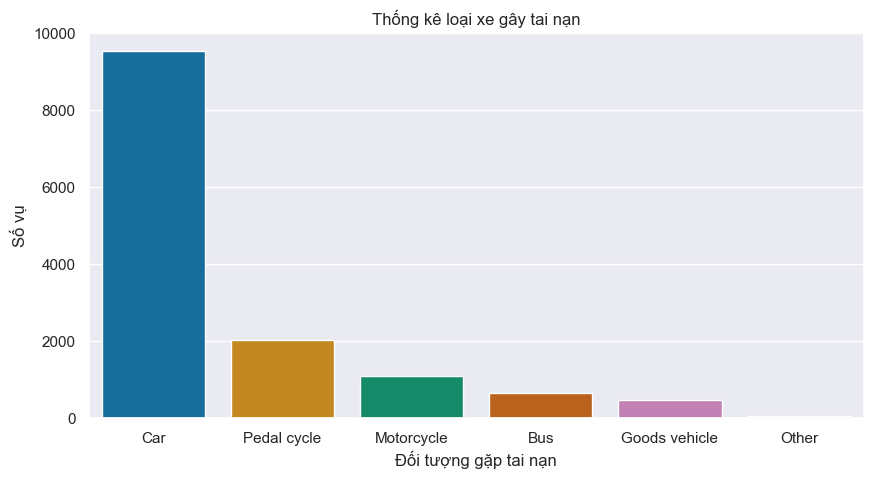

In [11]:
#TODO: visualize "Type of Vehicle"
statistics_causes_accident("Type of Vehicle")

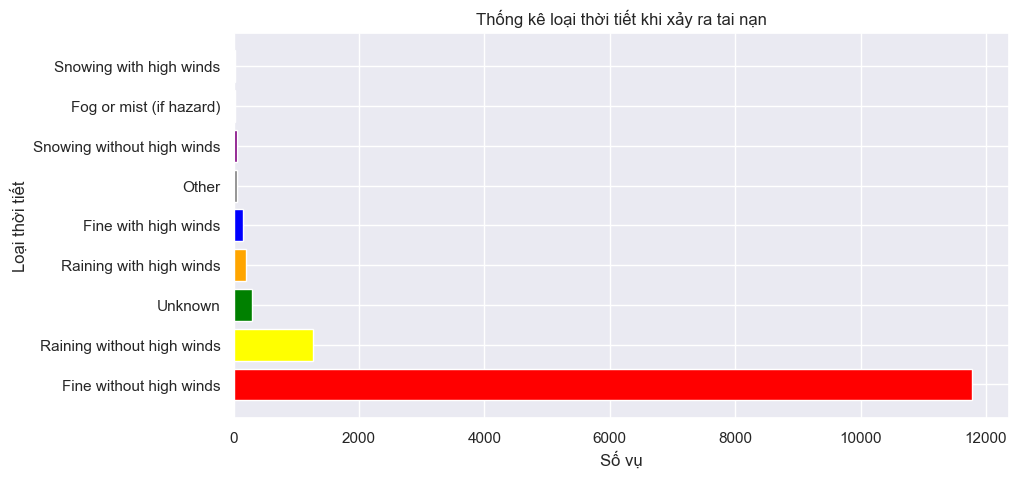

In [12]:
#TODO: visualize "Weather Conditions"
statistics_causes_accident("Weather Conditions")

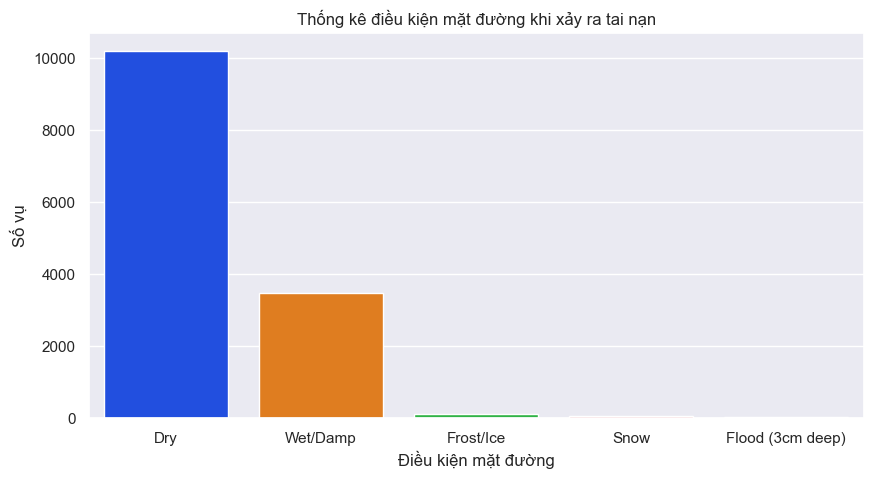

In [13]:
#TODO: visualize "Road Surface"
statistics_causes_accident("Road Surface")

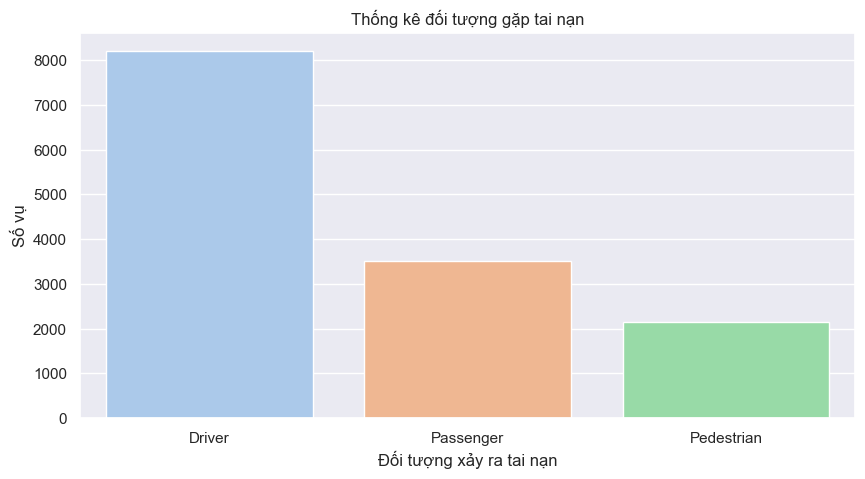

In [14]:
#TODO: visualize "Casualty Class"
statistics_causes_accident("Casualty Class")

👉 Loại phương tiện phổ biến là xe hơi (Car)

👉 Kiểu thời tiết phổ biến là thời tiết tốt không có gió to (Fine without high winds)

👉 Điều kiện mặt đường phổ biến là khô ráo (Dry)

👉 Đối tượng gặp tai nạn phổ biến là tài xế (Driver)

<a id="2.1"></a>
<div style="text-align: left; background-color:#DCEAF0; font-family:Arial;color: #2A6C8F; padding:10px 10px;border-radius:12px 5px 12px 5px;width:110px;font-size: 23px;border-style: solid;border-color: green">Câu hỏi 3:</div> 

### **<span style='color:#2B9C15 '>🤔 Xu hướng của các vụ tai nạn theo tháng và theo năm như thế nào?</span>**
- Tại đây tụi mình đã vẽ 2 group bar chart (1 theo tháng và 1 theo năm). Trong mỗi group, cần thể hiện được số lượng các ca tai nạn theo mức độ (như vậy, mỗi group sẽ có 3 cột).
- Cũng trong 2 biểu đồ trên, tụi mình vẽ thêm 2 line chart thể hiện tổng số ca bị tai nạn theo tháng/năm.

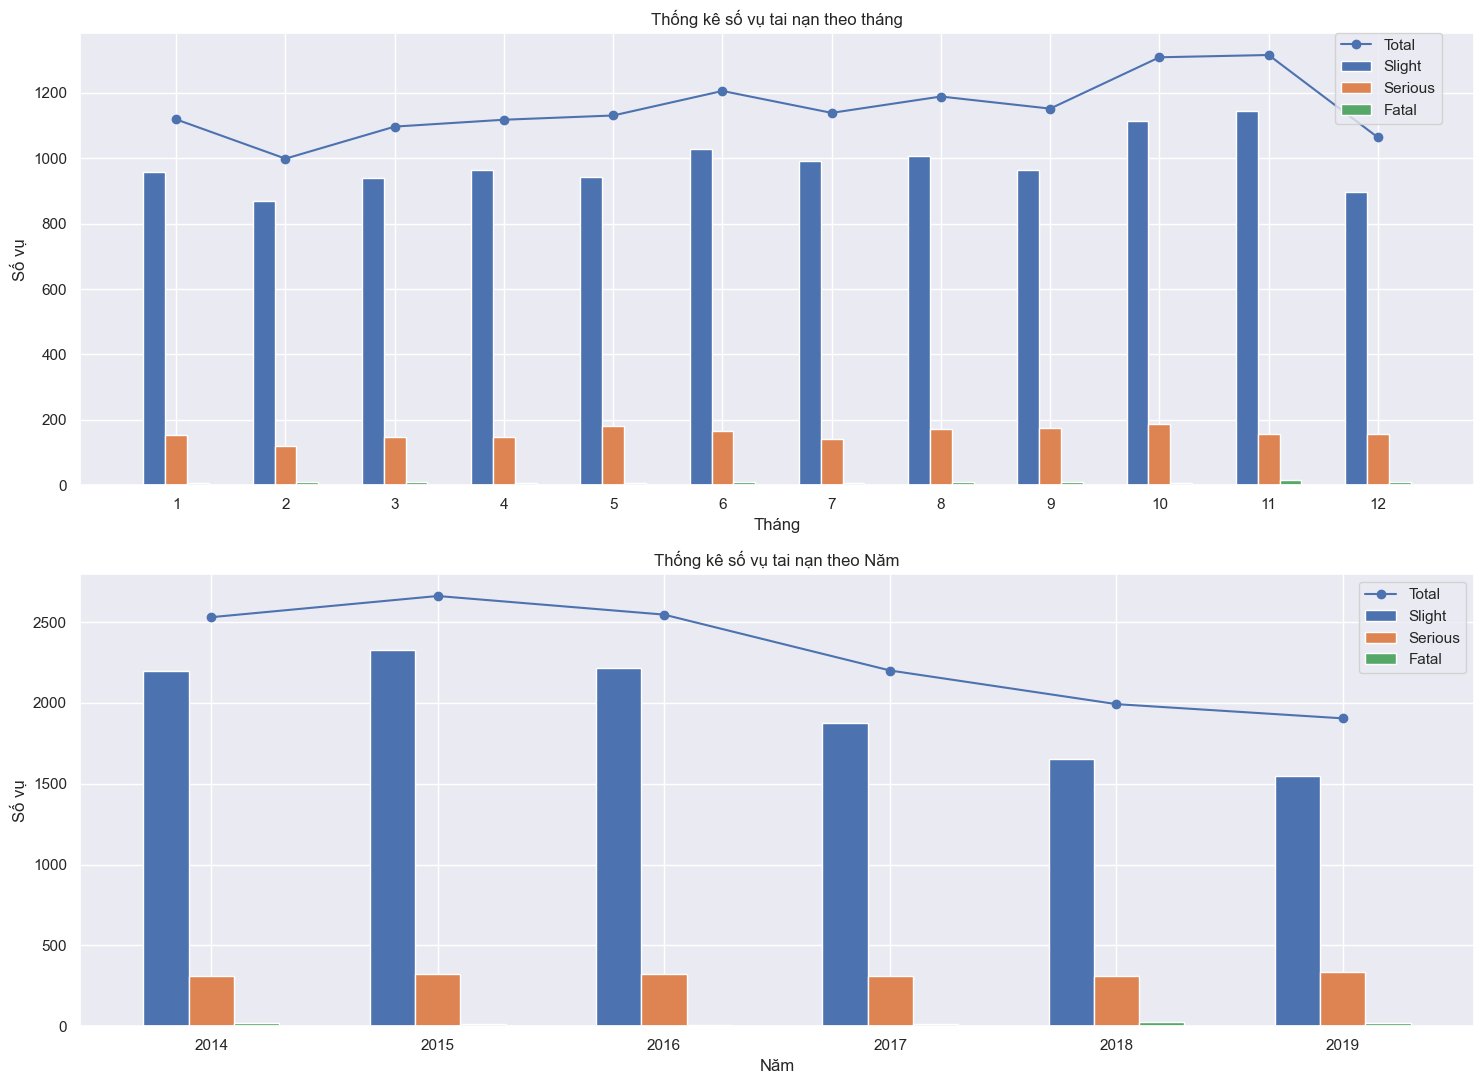

In [15]:
slight_month = {}
serious_month = {}
fatal_month = {}
total_month = {}
slight_year = {}
serious_year = {}
fatal_year = {}
total_year = {}

month = pd.unique(list_month)
year = pd.unique(list_year)
# ==========================================================================================
for i in month:
      slight_month[i], serious_month[i], fatal_month[i], total_month[i] = [0, 0, 0, 0]

for i in year:
      slight_year[i], serious_year[i], fatal_year[i], total_year[i] = [0, 0, 0, 0]
      
for i, value in enumerate(df["Casualty Severity"]):
      if value == "Slight":
            slight_month[dt[i].month] += 1
            slight_year[dt[i].year] += 1
      elif value == "Serious":
            serious_month[dt[i].month] += 1
            serious_year[dt[i].year] += 1
      elif value == "Fatal":
            fatal_month[dt[i].month] += 1
            fatal_year[dt[i].year] += 1

for m in month:
      total_month[m] = slight_month[m] + serious_month[m] + fatal_month[m] 

for y in year:
      total_year[y] = slight_year[y] + serious_year[y] + fatal_year[y]

figure, axis = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 11))

color = ['blue', 'orange', 'green']
# =================================== Theo tháng - Plot 1 ==================================
labels = month
x = np.arange(len(labels))
axis[0].plot(list(total_month.values()), '-o', label = "Total")
axis[0].bar(x - 0.2, list(slight_month.values()), width=0.2, label = 'Slight')
axis[0].bar(x, list(serious_month.values()), width=0.2, label = 'Serious')
axis[0].bar(x + 0.2, list(fatal_month.values()), width=0.2, label = 'Fatal')

axis[0].set_ylabel('Số vụ')
axis[0].set_xlabel('Tháng')
axis[0].set_title('Thống kê số vụ tai nạn theo tháng', loc = 'center')
axis[0].set_xticks(x, labels)
axis[0].legend(loc = (0.9, 0.8))

#  ================================== Theo năm - Plot 2 =====================================
labels = year
x = np.arange(len(labels))
axis[1].plot(list(total_year.values()), '-o', label = "Total")
axis[1].bar(x - 0.2, list(slight_year.values()), width=0.2, label = 'Slight')
axis[1].bar(x, list(serious_year.values()), width=0.2, label = 'Serious')
axis[1].bar(x + 0.2, list(fatal_year.values()), width=0.2, label = 'Fatal')
axis[1].set_ylabel('Số vụ')
axis[1].set_xlabel('Năm')
axis[1].set_title('Thống kê số vụ tai nạn theo Năm')
axis[1].set_xticks(x, labels)
axis[1].legend()
figure.tight_layout()

plt.show()


### **<span style='color:#289045 '>Xu hướng của các vụ tai nạn theo tháng cao </span>**
👉 Các vụ tai nạn thường có xu hướng giảm từ tháng 12 cho đến tháng 5 và tăng mạnh từ tháng 6 đến tháng 11. Nguyên nhân có thể là do tình hình thời tiết từ tháng 6-12 thường mưa và ẩm ướt và từ tháng 1-5 thời tiết khô ráo và ít mưa hơn (dựa vào số vụ tai nạn theo tình hình thời tiết và điều kiện mặt đường).

👉 Đỉnh điểm là thời điểm tháng 10 đến tháng 11. Đây là khoảng thời gian thời tiết rất lạnh. Trung bình nhiệt độ giao động trong khoảng từ 2 độ đến 14 độ
https://vi.weatherspark.com/m/19863/10/Th%E1%BB%9Di-Ti%E1%BA%BFt-Trung-B%C3%ACnh-trong-Th%C3%A1ng-10-%E1%BB%9F-Toronto-Canada#Figures-Temperature

👉 Thấp nhất là khoảng thời gian từ tháng 1 đến tháng 2. Lý do là vì `khoảng thời gian này mọi người đang ăn tết, đánh bài, chơi lô chơi đề, ai gảnh đâu đi bốc đầu đầu năm đầu tết.`

### **<span style='color:#289045 '>Xu hướng của các vụ tai nạn theo năm đang giảm dần </span>**

👉 Các vụ tai nạn giảm dần qua các năm sau khi tăng nhẹ vào năm 2015. Nguyên nhân có thể là do mọi người dần chuyển qua di chuyển bằng các phương tiện công cộng và ít sử dụng xe hơi cá nhân để di chuyển, nhờ đó các vụ tai nạn giảm đáng kể so với các năm trước.

👉 Đây là điều tích cực mà chúng ta có thể thấy. Nguyên nhân khác có thể là ý thức tham gia giao thông được nâng cao hoặc những công trình, những cơ sở vật chất đường đi đã được cải thiện, làm mới và tiện lợi hơn.


Text(0.5, 1.0, 'Thống kê theo tháng về thời tiết lúc xảy ra tai nạn năm 2019 ở Canada')

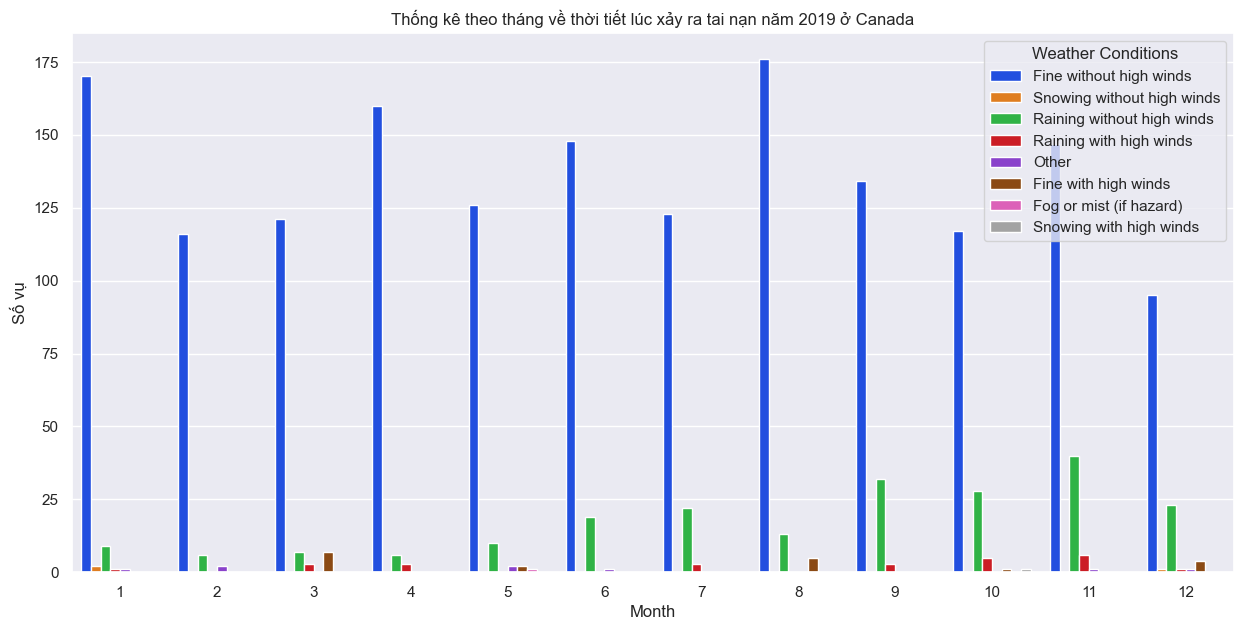

In [16]:
month = []
year = []
for i in range(len(df.index)):
      month.append(df['Accident Date'][i].month)
      year.append(df['Accident Date'][i].year)
      
df['Month'] = month
df['Year'] = year
year_2019 = df[df['Year'] == 2019]
year_2019.head()
fig = plt.figure(figsize = (15, 7))
sns.countplot(data = year_2019, x = year_2019['Month'], hue = 'Weather Conditions', palette='bright')
plt.ylabel("Số vụ")
plt.title("Thống kê theo tháng về thời tiết lúc xảy ra tai nạn năm 2019 ở Canada")

<a id="2.1"></a>
<div style="text-align: left; background-color:#DCEAF0; font-family:Arial;color: #2A6C8F; padding:10px 10px;border-radius:12px 5px 12px 5px;width:110px;font-size: 23px;border-style: solid;border-color: green">Câu hỏi 4:</div> 

### **<span style='color:#2B9C15 '>🤔 Khung giờ tai nạn trong ngày/tuần thường xảy ra tai nạn nhất</span>**
- Tại đây chúng mình đã vẽ biểu đồ cột thể hiện số lượng vụ tai nạn theo các khung giờ (các khoảng thời gian trong ngày).
- Chúng mình đã tùy chọn khoảng thời gian để có minh họa tốt nhất giúp trả lời câu hỏi.

{0: 222, 1: 137, 2: 105, 3: 76, 4: 94, 5: 95, 6: 212, 7: 591, 8: 933, 9: 594, 10: 599, 11: 708, 12: 735, 13: 822, 14: 830, 15: 1102, 16: 1239, 17: 1268, 18: 1096, 19: 787, 20: 562, 21: 410, 22: 338, 23: 284}


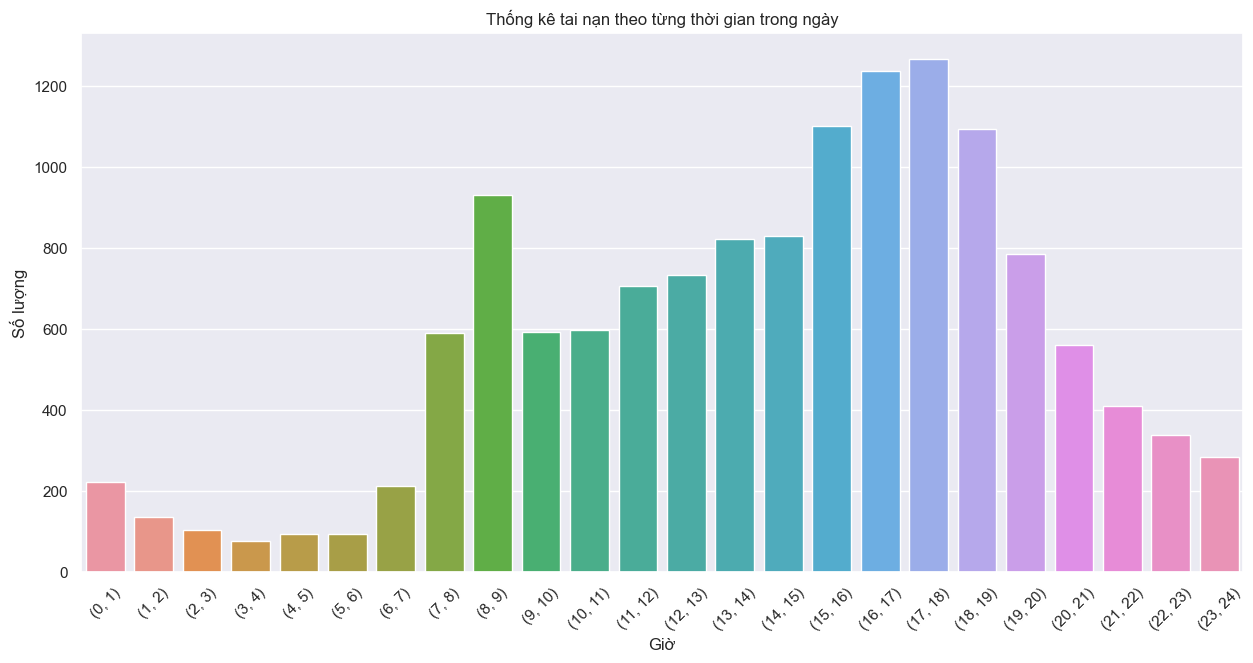

In [17]:
hour = []
for i in range(len(df.index)):
      hour.append(df['Time (24hr)'][i].hour)
accident_time = {}
labels = [(i, i+1) for i in range(24)]

accident_time = {i: hour.count(i) for i in range(len(labels))}
print(accident_time)
fig = plt.figure(figsize=(15, 7))
sns.barplot(list(accident_time.keys()), list(accident_time.values()))
plt.xlabel("Giờ")
plt.ylabel("Số lượng")
plt.title("Thống kê tai nạn theo từng thời gian trong ngày")
plt.xticks(np.arange(24), labels, rotation = 45)

plt.show()

### **<span style='color:#289045 '>👉 Tai nạn xảy ra nhiều nhất theo ngày </span>**
- Tai nạn xảy ra nhiều nhất vào khoảng 8 - 9 giờ (khung giờ sáng)
và khoảng 15 - 20 giờ (khung giờ tối)
- Lý do có thể là sau giờ làm hành chính, nhiều người đi làm hoặc đi về

<a id="2.1"></a>
<div style="text-align: left; background-color:#DCEAF0; font-family:Arial;color: #2A6C8F; padding:10px 10px;border-radius:12px 5px 12px 5px;width:110px;font-size: 23px;border-style: solid;border-color: green">Câu hỏi 5:</div> 

### **<span style = 'color:#97DECE '> Câu hỏi trên đã giúp bạn xác định khoảng thời gian thường xảy ra tai nạn. Tuy nhiên, liệu ngày nào cũng xảy ra tai nạn vào các khung giờ đó?🤔 Để kiểm tra, chúng mình sẽ tìm hiểu cụ thể xem ngày nào trong tuần thì hay xảy ra tai nạn.  </span>**

👉 **Chúng mình đã vẽ 1 heatmap với trục tung thể hiện các thứ trong tuần (từ Thứ Hai đến CN) và trục hoành thể hiện giờ trong 1 ngày (0h->23h). Màu trong mỗi cell sẽ thể hiện số lượng tai nạn. Màu càng tối thì tai nạn càng nhiều.**

In [18]:
def convert_1d_to_2d(list, cols):
	return [list[j:j + cols] for j in range(0, len(list), cols)]

day_labels = ['Chủ Nhật', 'Thứ Bảy', 'Thứ Sáu', 'Thứ Năm', 'Thứ Tư', 'Thứ Ba', 'Thứ Hai']
hour_labels = list(range(24))
weekday = [i.isoweekday() for i in dt]

d = {'Weekday': weekday, 'Hour': hour}
data = pd.DataFrame(d, columns = ['Weekday', 'Hour'])

g = data.groupby(['Weekday', 'Hour'])
g.groups
g2 = g.aggregate(len)

g3 = list(g2.values)
g4 = list(convert_1d_to_2d(g3, 24))
g4.reverse()


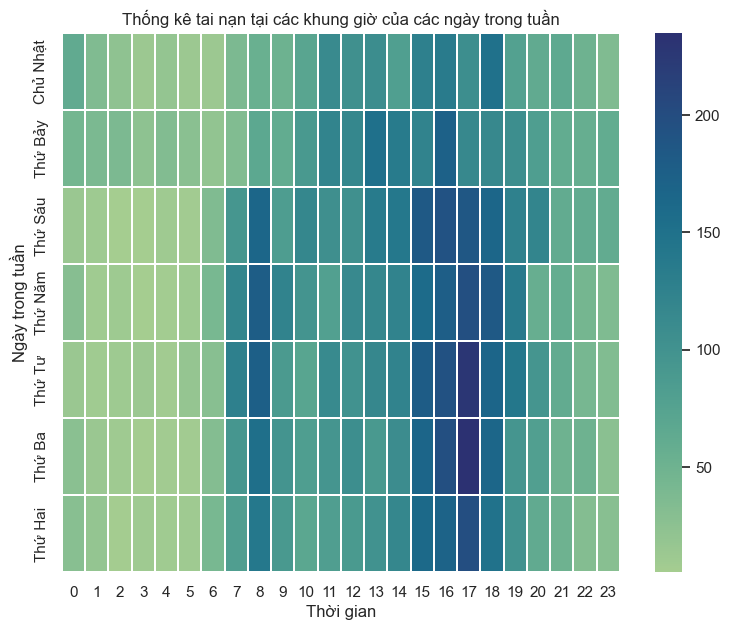

In [19]:
fig = plt.figure(figsize = (9, 7))
# sns.heatmap(g)
sns.heatmap(g4, linewidth=.25, cmap="crest")
plt.xlabel("Thời gian")
plt.ylabel("Ngày trong tuần")
plt.yticks(np.arange(0.5, 7.5), day_labels)
plt.title("Thống kê tai nạn tại các khung giờ của các ngày trong tuần")
plt.show()

### **<span style='color:#289045 '>👉 Nhận xét về khoảng thời gian trong tuần thường xảy ra tai nạn. Thử giải thích tại sao.</span>**

* Màu càng sáng càng xảy ra nhiều vụ tai nạn. Chúng ta thấy 2 cells tối nhất là thời gian lúc 17h thứ 3 và thứ 4

* Đa phần các vụ tai nạn xảy ra ở trong khoảng 7 giờ sáng đến 7 giờ tối. Nhiều nhất là khung giờ 7-8h và 15-18h giờ mỗi ngày. Vì đây là thời điểm mọi người ra đường để đi làm và tan làm đi về nên lưu lượng giao thông cao dẫn đến tỉ lệ tai nạn cao.

* Điểm đặc biệt của heatmap này là ở khung giờ 15-19h - nhiều đáng kể chủ yếu là những thành phần thiếu ý thức như uống rượu trước khi lái xe, lạng lách đánh võng,...

<a id="2.1"></a>
<div style="text-align: left; background-color:#DCEAF0; font-family:Arial;color: #2A6C8F; padding:10px 10px;border-radius:12px 5px 12px 5px;width:110px;font-size: 23px;border-style: solid;border-color: green">Câu hỏi 6:</div> 

### **<span style='color:#2B9C15 '>🤔 Chi tiết về đối tượng và mức độ tai nạn</span>**

**<span style = 'color: #8D9EFF'> Cụ thể là nhóm tuổi nào thường xuyên gây tai nạn? </div>**

👉 Vẽ biểu đồ cột thể hiện các số lượng các vụ tai nạn gây ra bởi các nhóm tuổi khác nhau.

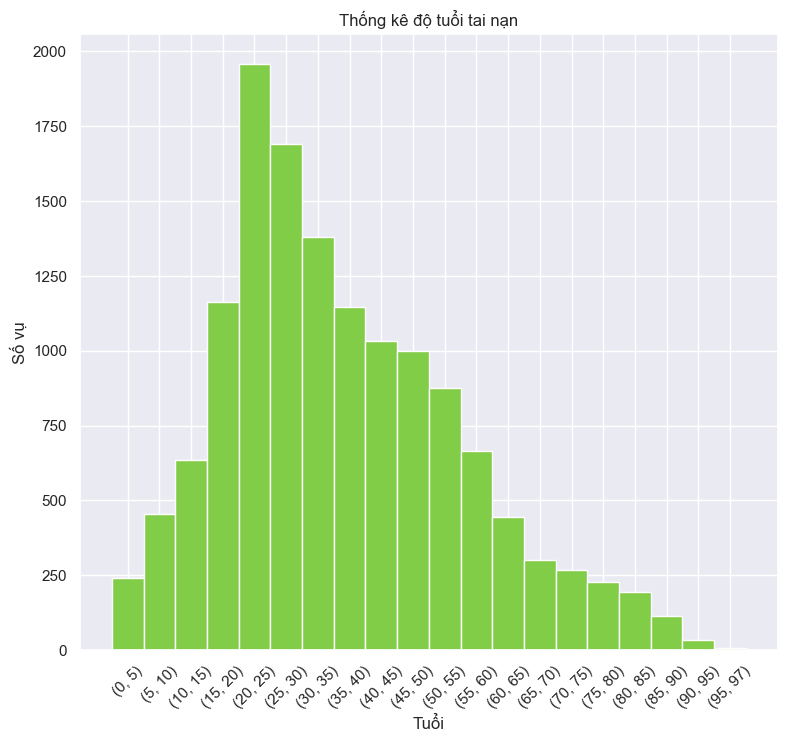

<Figure size 640x480 with 0 Axes>

In [20]:
accident_age = {}
labels = []
age = list(df["Age of Casualty"])
i = 0
while i < max(age):
      if i + 5 > max(age):
            labels.append((i, max(age)))
            accident_age[i] = sum(age.count(j) for j in range(i, max(age)))
            break
      labels.append((i, i + 5))
      accident_age[i] = sum(age.count(j) for j in range(i, i + 5))
      i += 5

fig = plt.figure(figsize = (9, 8))

values = list(accident_age.values())
keys = list(accident_age.keys())
plt.bar(keys, values, width=5,color = '#82CD47')
plt.xlabel("Tuổi")
plt.ylabel("Số vụ")
plt.title("Thống kê độ tuổi tai nạn")
plt.xticks(np.arange(0, 100, 5), labels, rotation = 45)
plt.show()
plt.tight_layout()


👉 Nhóm tuổi từ 20 đến 35 là nhóm tuổi hay gây ra tai nạn. Cụ Thể nhóm 20 đến 25 có gần 2000 vụ. Lý do cũng dễ hiểu. Vì nhóm tuổi này chơi đồ nhiều nên hổ báo cáo chồn. Một số tham gia giao thông thiếu ý thức. Bên cạnh đấy, đây là nhóm tuổi tham gia giao thông nhiều hơn so với các nhóm đối tượng khác 

<div style="text-align: left; background-color:#DCEAF0; font-family:Arial;color: #2A6C8F; padding:10px 10px;border-radius:12px 5px 12px 5px;width:110px;font-size: 23px;border-style: solid;border-color: green">Câu hỏi 7:</div> 

**<span style = 'color:#2B9C15; font-size: 22px'> 🤔Tìm hiểu mối quan hệ giữa độ tuổi, giới tính, đối tượng và mức độ nghiêm trọng trong vụ tai nạn. </span>**

👉 Đề xuất 1 hoặc nhiều biểu đồ giúp biểu diễn mỗi quan hệ trên.

👉 Biện luận các mối quan hệ trên và cho biết việc rút ra quan hệ đó có ý nghĩa gì.

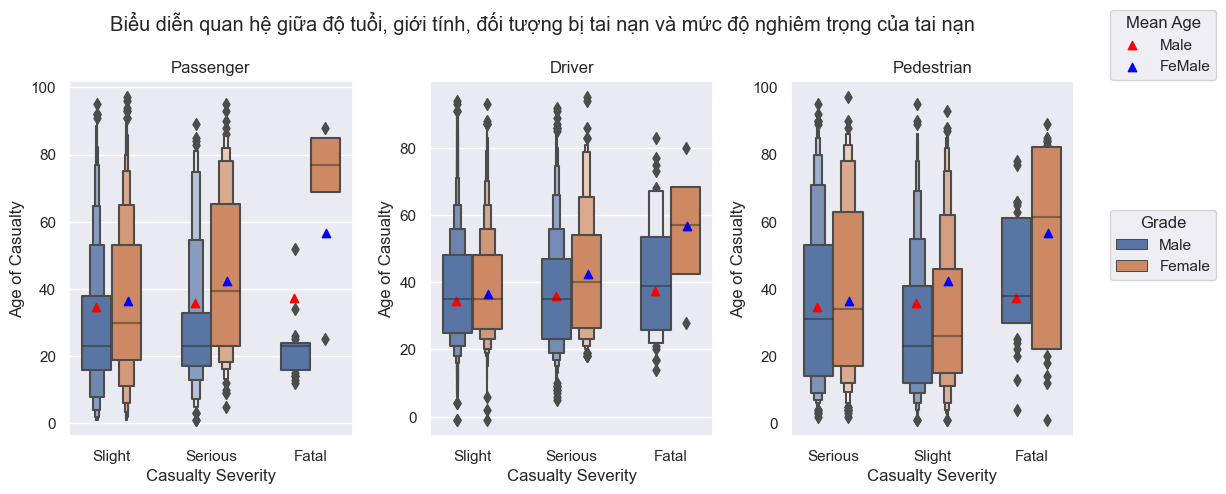

In [37]:
mean_age = df.groupby(["Sex of Casualty", 'Casualty Severity'])['Age of Casualty'].mean()
male = list(mean_age.loc['Male'])
female = list(mean_age.loc['Female'])
male.reverse()
female.reverse()
fig, ax = plt.subplots(figsize =  (11, 5), nrows = 1, ncols = 3)
sns.set(font_scale = 1)
hor_coordinates = np.arange(0,3)
casualty_class = list(pd.unique(df["Casualty Class"]))
for i in range(len(casualty_class)):
      plt.subplot(1, 3, i + 1)
      sns.boxenplot(x = "Casualty Severity", y = "Age of Casualty", hue = "Sex of Casualty", hue_order = ['Male','Female'], data = df[df["Casualty Class"] == casualty_class[i]], width = 0.6)
      plt.title(casualty_class[i])
      ax[i].get_legend().remove()
      m =  ax[i].scatter(hor_coordinates - 0.16, male, marker = '^', color = 'red')
      f = ax[i].scatter(hor_coordinates + 0.16, female, marker = "^",color = 'blue')

fig.suptitle("Biểu diễn quan hệ giữa độ tuổi, giới tính, đối tượng bị tai nạn và mức độ nghiêm trọng của tai nạn")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.12, 0.6), title="Grade")
fig.legend([m, f], ['Male', 'FeMale'],bbox_to_anchor=(1.12, 1), title="Mean Age")
plt.grid(False)
plt.tight_layout()
plt.show()

### **<span style='color:#8D9EFF; font-size: 22px '>💬 Nhận xét biểu đồ </span>**
Theo figure biểu diễn mỗi quan hệ giữa 4 đối tượng `độ tuổi, giới tính, đối tượng và mức độ nghiệm trọng của tai nạn` thì ta rút được những điều sau:

👉 Với đối tượng là "Passenger"(hành khách) thì các vụ tai nạn ở nữ giới độ tuổi phân bố rộng hơn nam giới. Độ tuổi trung bình gây tai nạn của nữ cũng cao hơn giới. Và đặc biệt là số vụ tai ở mức độ gây tử vong thì có sự chênh lệch rất lớn giữa nam và nữ giới (độ tuổi của nữ giới cao hơn nhiều so với nam giới).Ý nghĩa là nữ giới thì mức độ xảy ra tai nạn trải đều hơn so với nam giới và độ tuổi xảy ra tai nạn cũng cao hơn. Nguyên nhân có lẽ là do nam giới thì thường thích lái xe hơn nên khi càng lớn tuổi thì thì sự phân bố của nữ giới có mức độ tuổi cao hơn. Hoặc cũng có lẽ là do tuổi thọ của nữa giới cao hơn.

👉 Với đối tượng là "Driver"(tài xế) thì sự phân bố tuổi và trung bình tuổi của nam và nữ giới khá bằng nhau và sự chênh lệnh cũng giảm mạnh so với đối tượng hành khách. Ý nghĩa là đối tượng tài xế thì mức độ xảy ra tai nạn ở các độ tuổi của nam và nữ gần như là bằng nhau .Nguyên nhân có lẽ la do với đối tượng tài xế thì dù năm hay nữ thì thường chỉ lái xe vào độ tuổi từ 20-50 tuổi và qua độ tuổi đó thì thường ít di chuyển hơn nên sự phân bố độ tuổi diễn ra không nhiều.

👉 Với đối tượng là "Pedestrian"(người dân) thì sự phân bố tuổi và trung bình tuổi của nam và nữ giới không có sự chênh lệch quá lớn và sự phân bố độ tuổi ở cả nam và nữ cũng rộng hơn các đối tượng khác. Ý nghĩa là tai nạn xảy ra ở các độ tuổi ở cả nam và nữ dường như là như nhau. Nguyên nhân có lẻ là tai nạn xảy ra với người đi bộ ít bị ảnh hưởng với yếu tố độ tuổi vì người đi bộ ít khi là nguyên nhân chính dẫn đến tai nạn.

👉 Tổng quan cả các quan hệ cho ta thấy, sự phân bố tuổi của nữa giới luôn cao hơn nam giới. Ý nghĩa là nữ giới ở độ tuổi cao có tỉ lệ xảy ra tai nạn cao hơn và ở nam thì độ tuổi có tỉ lệ gây ra tai nạn cao hơn là từ 20-50 tuổi và thường chỉ nằm ở khoảng này.


<div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">KẾT THÚC PHẦN VISUALIZATION</div>
<div style="text-align: left; background-color:#fadefc; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px"> 😀Thank you for watching😀 </div>